In [1]:
from PhotoData import MPI_Mainz
import numpy as np
from matplotlib import pyplot as plt

In [2]:
species = 'C2H2'
mpi = MPI_Mainz(species) # seach MPI database for species
mpi.get_data() # get all data corresponding to species

In [3]:
# mpi.all_data contains all data from search
# its a dictionary. Here are its keys
for key in mpi.all_data.keys():
    print(key)

wavelength
cross section
temperature
year
papers
bibtex


In [4]:
print('First data file')
print('---------------')
print('number of data points =',len(mpi.all_data['wavelength'][0]))
print('Paper = ',mpi.all_data['papers'][0])
print('bibtex citation = \n\n',mpi.all_data['bibtex'][0])

First data file
---------------
number of data points = 5290
Paper =  Benilan(2000)
bibtex citation = 

 @article{B_nilan_2000,
	doi = {10.1016/s0032-0633(00)00019-2},
	url = {https://doi.org/10.1016%2Fs0032-0633%2800%2900019-2},
	year = 2000,
	month = {apr},
	publisher = {Elsevier {BV}},
	volume = {48},
	number = {5},
	pages = {463--471},
	author = {Y. B{\'{e}}nilan and N. Smith and A. Jolly and F. Raulin},
	title = {The long wavelength range temperature variations of the mid-{UV} acetylene absorption coefficient},
	journal = {Planetary and Space Science}
}


`mpi.find_best_data()` tries to put together the single "best" string of wavelengths and cross sections that using all the data. The keyword `best` determines the critera for the best data

- `best = 'max resolution'` - Use data with the maximum wavelength resolution.
- `best = 'most recent'` - Most recent published data.
- `best = 'smallest xsection'` - Data with the smallest cross section values
- `best = 'largest xsection'` - Data with the largest cross section values
- `best = 'single longest'` - Single study which spans the largest wavelength range.

In [5]:
mpi.find_best_data(best='max resolution')
print(mpi.best_data)

{'wavelength': array([  6.2  ,   6.26 ,   6.33 , ..., 236.277, 236.283, 236.29 ]), 'cross section': array([1.8700e-19, 1.7600e-19, 1.7600e-19, ..., 8.6408e-23, 1.0410e-22,
       1.2716e-22])}


In [6]:
# citations for the best data are stored in `mpi.best_data_citations`
for key in mpi.best_data_citations.keys():
    print(key)

print()
for i in range(len(mpi.best_data_citations['wavelength range'])):
    print(mpi.best_data_citations['citation'][i],mpi.best_data_citations['wavelength range'][i])

citation
wavelength range
bibtex

Cooper(1995) [6.2, 26.2]
WuJudge(1985) [26.2, 66.2]
MetzgerCook(1964) [66.2, 76.2]
Han(1989) [76.2, 96.2]
WalkerWeissler(1955) [96.2, 106.2]
NakayamaWatanabe(1964) [106.2, 116.2]
Cheng(2011) [116.2, 146.2]
Smith(1991) [146.2, 196.2]
Wu(1989) [196.2, 206.2]
Chen(1991) [206.2, 226.2]
Benilan(2000) [226.2, 236.29]


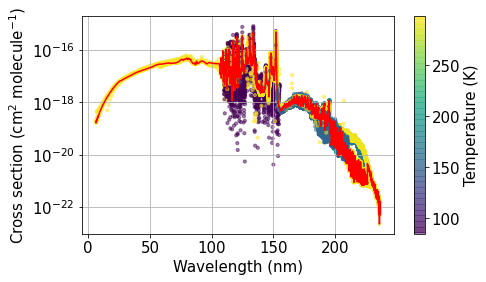

In [7]:
# plot the best data:
# red = best data
# other colors = all data
fig, ax = mpi.plot()
plt.show()

In [8]:
# I can try to retrieve data used by the Atmos photochem model
mpi.get_atmos_data(species)
for key in mpi.atmos_data.keys():
    print(key)

alinc
vpl
mpi
zahnle


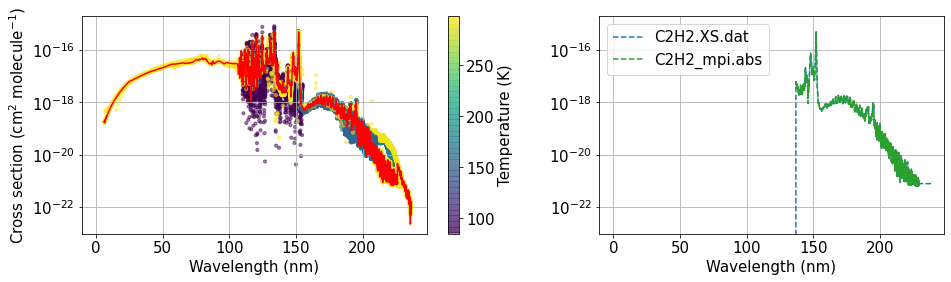

In [9]:
# I can compare these new xsections to the atmos data
fig, ax = mpi.plot(plot_atmos=True)
plt.show()

Generate a pdf citation. You must have `pdflatex` and `bibtex` installed for `mpi.generate_pdf()` to work.

In [10]:
mpi.generate_tex(plot_atmos = True)
mpi.generate_pdf()